In [1]:
import pandas as pd
df = pd.read_pickle("sample_data.pkl")

In [2]:
df.head(2)

,text,label,tokenized_words
7851,【內地調查：疫情對中國住宿和餐飲行業影響最大】 中新社報道，上海國家會計學院會...,0,【 內地 調查 ： 疫情 對 中國 住宿 和 餐 飲行業 影響 最大 】 ...
168447,【香港青年協會未來技能博覽】「疫情時代與STEM教育前瞻」分享會 疫情持續，令人反思未來的教...,0,【 香港 青年 協會 未來 技能 博覽 】 「 疫情 時代 與 STEM 教育 前瞻 」 分...


In [3]:
df = df[df['label'] > 0]

In [4]:
df.rename(columns={'tokenized_words': 'tokenized_text'},
          inplace=True, errors='raise')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(df['tokenized_text']))

In [6]:
X

<110767x611393 sparse matrix of type '<class 'numpy.float64'>'
	with 14659224 stored elements in Compressed Sparse Row format>

In [10]:
from scipy import sparse

sparse.save_npz("X.npz", X)


In [13]:
df['label'].to_csv("y.csv", index=False)

In [ ]:
your_matrix_back = sparse.load_npz("X.npz")

In [19]:
'''
NaiveBayes.py
'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.25)


In [ ]:
classifier = ComplementNB()
classifier.fit(X_train, y_train)
predict_test = classifier.predict(X_test)
#accuracy_test = f1_score(y_test,predict_test)



In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           1       0.68      0.31      0.42      1685
           2       0.73      0.60      0.66      1988
           3       0.74      0.87      0.80      3889
           4       0.80      0.73      0.76      2962
           5       0.81      0.61      0.70       655
           6       0.72      0.87      0.79      3367
           7       0.79      0.86      0.82      2566
           8       0.91      0.18      0.30       288
           9       0.78      0.47      0.59      1104
          10       0.59      0.84      0.69      4416
          11       0.83      0.37      0.51      1070
          12       0.89      0.25      0.39       978
          13       0.68      0.86      0.76      1829
          14       0.93      0.26      0.40       248
          15       0.77      0.54      0.63       647

    accuracy                           0.71     27692
   macro avg       0.78      0.57      0.61     27692
weighted avg       0.73   

<AxesSubplot:>

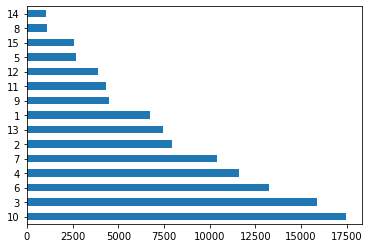

In [27]:
df['label'].value_counts().plot(kind='barh')

In [18]:
set(df['label'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [8]:
from XGModels import *

model, preds, y_test = XG_Classifier(X, df['label'])

C:\Users\samue\anaconda3\envs\CBSA\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.65      0.60      0.62      1686
           2       0.79      0.81      0.80      1986
           3       0.85      0.92      0.88      3963
           4       0.88      0.86      0.87      2900
           5       0.86      0.74      0.79       670
           6       0.88      0.87      0.87      3309
           7       0.92      0.95      0.93      2595
           8       0.86      0.73      0.79       275
           9       0.79      0.73      0.76      1124
          10       0.80      0.82      0.81      4363
          11       0.86      0.79      0.82      1078
          12       0.83      0.76      0.79       975
          13       0.87      0.89      0.88      1864
          14       0.80      0.69      0.74       259
          15       0.88      0.84      0.86       645

    accuracy                           0.84     27692
   macro avg       0.83      0.80      0.82     27692
weighted avg       0.84   

In [1]:
import pandas as pd
df = pd.read_pickle("sample_data.pkl")
df = df[df['label'] > 0]

In [8]:
pd.Series([len(i) for i in df.text]).describe()

count    110767.000000
mean        639.770970
std        1002.428455
min           0.000000
25%         216.000000
50%         358.000000
75%         752.000000
max       25786.000000
dtype: float64